In [1]:
import sys; sys.path.insert(0, '../'); sys.path.insert(0, 'analysis_notes/mupClassification/'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
%matplotlib inline

# Marco' flash-matching

In [40]:
ovrelay = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/from_interactive/prodgenie_bnb_nu_uboone_overlay_mcc8_v9_vertices.csv')

In [41]:
mup = ovrelay[ovrelay['1mu-1p']==True]
cosmic = ovrelay[ovrelay['cosmic']==True]
print len(mup)

429


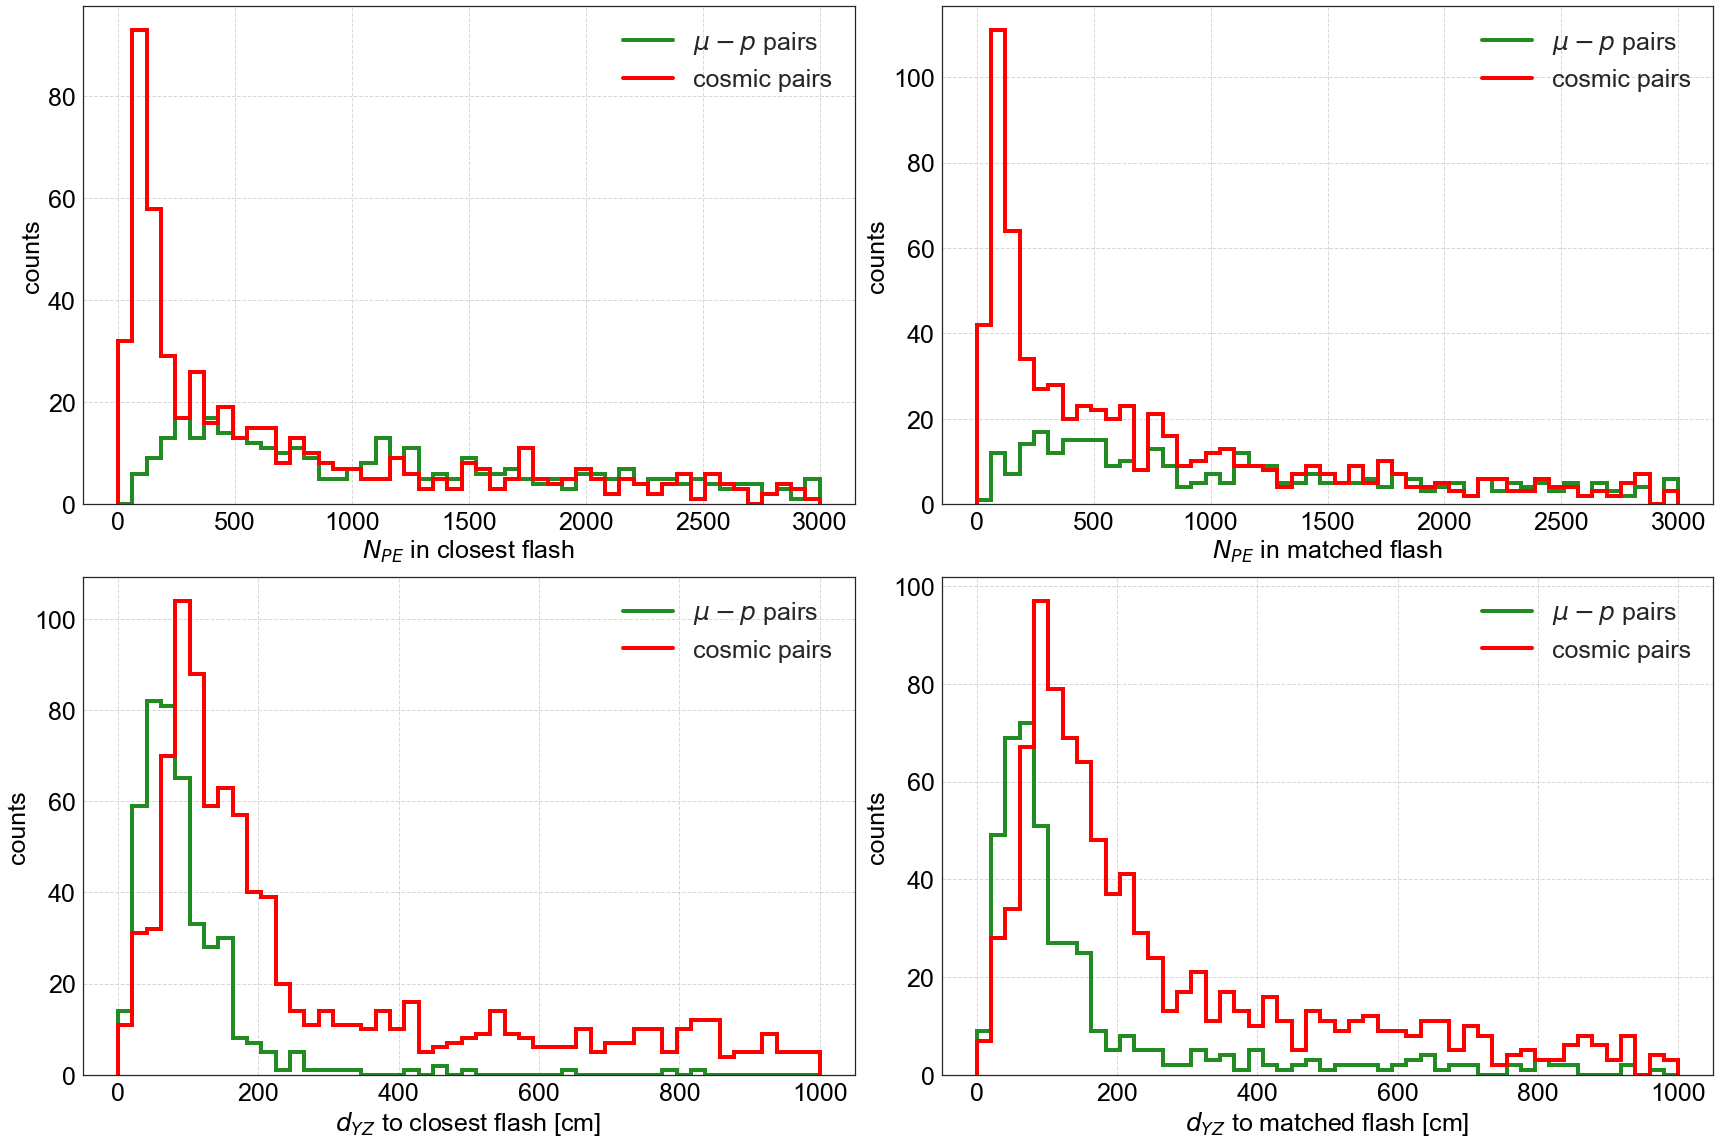

In [46]:
fig=plt.figure(figsize=(24,16))
for ivar,(var,xlabel,bins) in enumerate(zip(['ClosestFlash_TotalPE','MatchedFlash_TotalPE','ClosestFlash_YZdistance','MatchedFlash_YZdistance']
                   ,[r'$N_{PE}$ in closest flash ',r'$N_{PE}$ in matched flash ',r'$d_{YZ}$ to closest flash [cm] ',r'$d_{YZ}$ to matched flash [cm]']
                                            ,[linspace(0,3000,50),linspace(0,3000,50),linspace(0,1000,50),linspace(0,1000,50)])):
    ax = fig.add_subplot(2,2,ivar+1)
    for sam,slabel,scolor in zip([mup,cosmic]
                          ,['$\mu-p$ pairs','cosmic pairs']
                                 ,['forestgreen','red']):
        plt.hist(sam[var],bins=bins,histtype='step',linewidth=4,color=scolor);
        plt.plot([0,0],[0,0],color=scolor,linewidth=4,label=slabel)
    set_axes(ax,xlabel,'counts',do_add_legend=True,do_add_grid=True)

plt.tight_layout()

# my calculation of momentum vs. momentum calculator...

In [13]:
ovrelay = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/from_interactive/prodgenie_bnb_nu_uboone_overlay_mcc8_v9_vertices.csv')
mup = ovrelay[ovrelay['1mu-1p']==True]
print len(mup),'pairs of 1mu-1p'

354 pairs of 1mu-1p


(array([   1.,    0.,    0.,    1.,    0.,    1.,    3.,   12.,   65.,  271.]),
 array([-4.905581 , -4.4099819, -3.9143828, -3.4187837, -2.9231846,
        -2.4275855, -1.9319864, -1.4363873, -0.9407882, -0.4451891,  0.05041  ]),
 <a list of 10 Patch objects>)

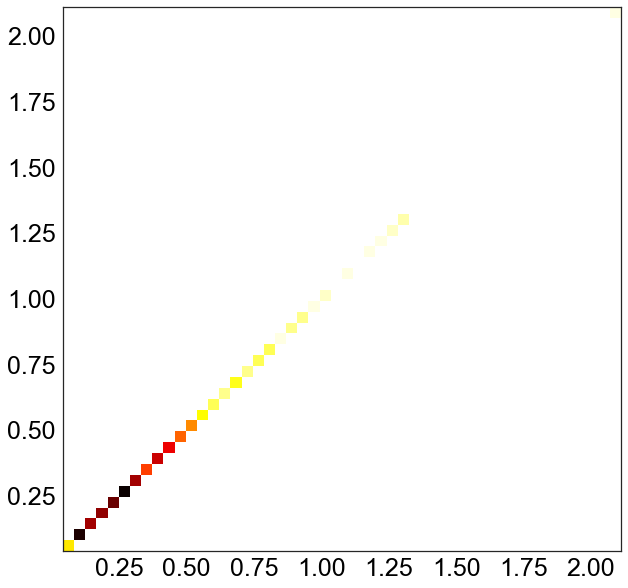

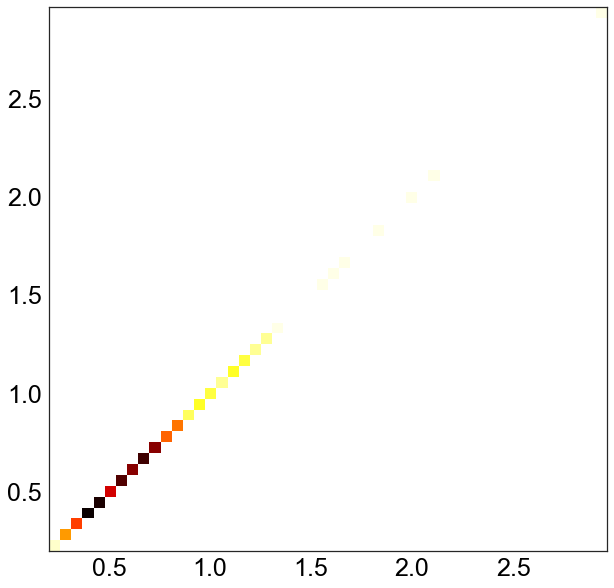

In [15]:
plot_2d_hist(mup.PmuHypothesisCalc,mup.reco_Pmu);
plot_2d_hist(mup.PpHypothesisCalc,mup.reco_Pp);
# plt.hist(mup.PmuHypothesisCalc-mup.reco_Pmu)
plt.hist(mup.PmuHypothesisCalc-mup.truth_Pmu)